In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("train.csv")
testset = pd.read_csv("test.csv")

In [4]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
testset.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
print(dataset.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [8]:
print(dataset.info())    # Why no null?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [9]:
print(dataset.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [11]:
print(dataset["Sex"][0:10])

0      male
1    female
2    female
3    female
4      male
5      male
6      male
7      male
8    female
9    female
Name: Sex, dtype: object


In [14]:
# pandas 里面refer各个column可以直接用 dataset名.columnname
survived_m_count = dataset.Survived[dataset.Sex == 'male'].value_counts()
survived_f_count = dataset.Survived[dataset.Sex == 'female'].value_counts()

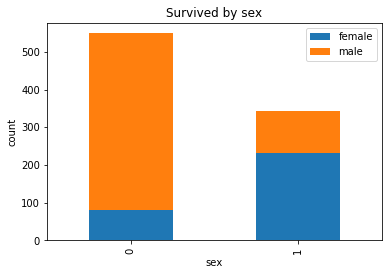

In [17]:
df = pd.DataFrame({"male": survived_m_count, "female": survived_f_count})
df.plot(kind = "bar", stacked = True)

plt.title("Survived by sex")
plt.xlabel("sex")
plt.ylabel("count")

plt.show()   #?? axis 方向是默认的？ dataframe定义时的方向？？

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64


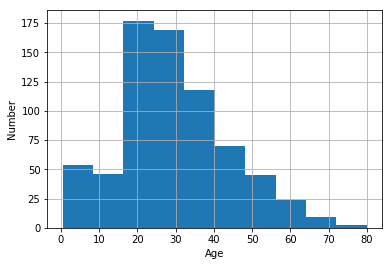

True


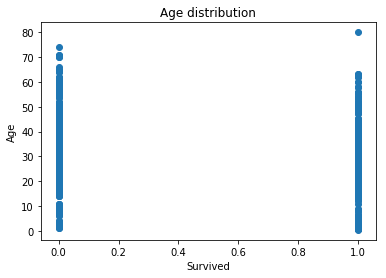

In [20]:

print( dataset["Age"][0:10])
dataset["Age"].hist()
plt.ylabel("Number")
plt.xlabel("Age")
plt.show()

print( dataset["Age"].isnull().values.any())
plt.scatter(dataset['Survived'], dataset['Age'])
plt.ylabel("Age")
plt.xlabel("Survived")
plt.title("Age distribution")
plt.show()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
5     8.4583
6    51.8625
7    21.0750
8    11.1333
9    30.0708
Name: Fare, dtype: float64


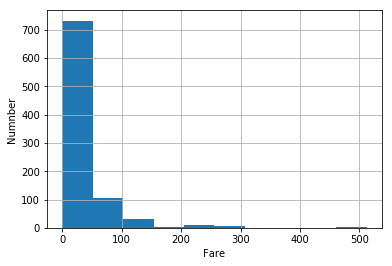

False


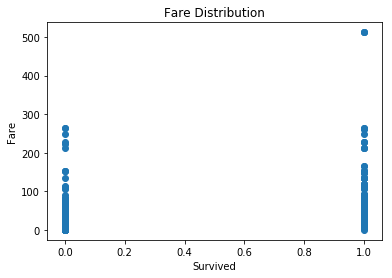

In [24]:
print(dataset["Fare"][0:10])
dataset["Fare"].hist()
plt.ylabel("Numnber")
plt.xlabel("Fare")
plt.show()

print(dataset["Fare"].isnull().values.any())
plt.scatter(dataset["Survived"], dataset["Fare"])
plt.ylabel("Fare")
plt.xlabel("Survived")
plt.title("Fare Distribution")
plt.show()

0    3
1    1
2    3
3    1
4    3
5    3
6    1
7    3
8    3
9    2
Name: Pclass, dtype: int64


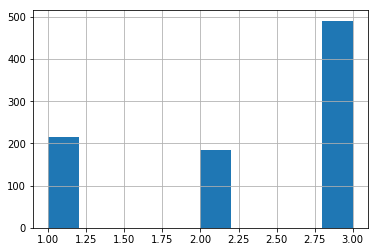

False
    p1  p2   p3
0   80  97  372
1  136  87  119


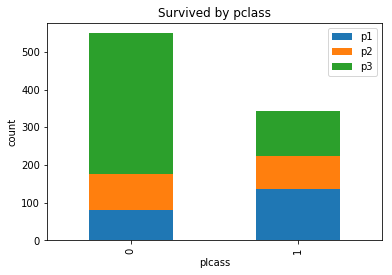

In [30]:
print(dataset["Pclass"][0:10])
dataset["Pclass"].hist()    # hist y axis is count of each value
plt.show()
print(dataset["Pclass"].isnull().values.any())

survived_p1_count = dataset.Survived[dataset["Pclass"] == 1].value_counts()
survived_p2_count = dataset.Survived[dataset["Pclass"] == 2].value_counts()
survived_p3_count = dataset.Survived[dataset["Pclass"] == 3].value_counts()

df = pd.DataFrame({"p1":survived_p1_count, "p2": survived_p2_count, "p3": survived_p3_count})
print(df)
df.plot(kind = "bar", stacked = True)
plt.title("Survived by pclass")
plt.xlabel("plcass")
plt.ylabel("count")
plt.show()

0    S
1    C
2    S
3    S
4    S
5    Q
6    S
7    S
8    S
9    C
Name: Embarked, dtype: object
0    427
1    217
Name: Survived, dtype: int64


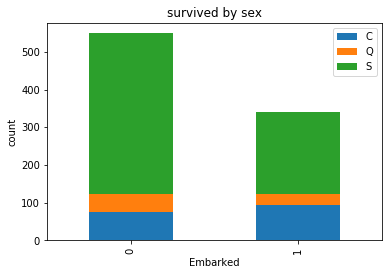

In [32]:
# df.A
print(dataset["Embarked"][0:10])
survived_s = dataset.Survived[dataset["Embarked"] == "S"].value_counts()
survived_c = dataset.Survived[dataset["Embarked"] == "C"].value_counts()
survived_q = dataset.Survived[dataset["Embarked"] == "Q"].value_counts()

print(survived_s)
df = pd.DataFrame({"S": survived_s, "C": survived_c, "Q": survived_q})
df.plot(kind = "bar", stacked = True)
plt.title("survived by sex")
plt.xlabel("Embarked")
plt.ylabel("count")
plt.show()

In [40]:






label    = dataset.loc[:, "Survived"]
data     = dataset.loc[:, ["Pclass", "Sex", "Age", "Fare", "Embarked"]]
testdata = testset.loc[:, ["Pclass", "Sex", "Age", "Fare", "Embarked"]]

print(data.shape)
print(data)

(891, 5)
     Pclass     Sex   Age      Fare Embarked
0         3    male  22.0    7.2500        S
1         1  female  38.0   71.2833        C
2         3  female  26.0    7.9250        S
3         1  female  35.0   53.1000        S
4         3    male  35.0    8.0500        S
5         3    male   NaN    8.4583        Q
6         1    male  54.0   51.8625        S
7         3    male   2.0   21.0750        S
8         3  female  27.0   11.1333        S
9         2  female  14.0   30.0708        C
10        3  female   4.0   16.7000        S
11        1  female  58.0   26.5500        S
12        3    male  20.0    8.0500        S
13        3    male  39.0   31.2750        S
14        3  female  14.0    7.8542        S
15        2  female  55.0   16.0000        S
16        3    male   2.0   29.1250        Q
17        2    male   NaN   13.0000        S
18        3  female  31.0   18.0000        S
19        3  female   NaN    7.2250        C
20        2    male  35.0   26.0000        S
2

In [43]:
def fillNan(data) :
    dataCopy = data.copy( deep =True )
    # ??? why the following cannot just say dataCopy["Age"] =
    dataCopy.loc[:, "Age"] = dataCopy["Age"].fillna(dataCopy["Age"].median())
    dataCopy.loc[:, "Fare"]= dataCopy["Fare"].fillna(dataCopy["Fare"].median())
    dataCopy.loc[:, "Pclass"]= dataCopy["Pclass"].fillna(dataCopy["Pclass"].median())
    dataCopy.loc[:, "Sex"]= dataCopy["Sex"].fillna("female")
    dataCopy.loc[:, "Embarked"]= dataCopy["Embarked"].fillna("S")
    return dataCopy
dataNoNan = fillNan(data)
testDataNoNan = fillNan(testdata)

print(data.isnull().values.any())
print(dataNoNan.isnull().values.any())
print(testdata.isnull().values.any())
print(testDataNoNan.isnull().values.any())
      
print(dataNoNan)

True
False
True
False
     Pclass     Sex   Age      Fare Embarked
0         3    male  22.0    7.2500        S
1         1  female  38.0   71.2833        C
2         3  female  26.0    7.9250        S
3         1  female  35.0   53.1000        S
4         3    male  35.0    8.0500        S
5         3    male  28.0    8.4583        Q
6         1    male  54.0   51.8625        S
7         3    male   2.0   21.0750        S
8         3  female  27.0   11.1333        S
9         2  female  14.0   30.0708        C
10        3  female   4.0   16.7000        S
11        1  female  58.0   26.5500        S
12        3    male  20.0    8.0500        S
13        3    male  39.0   31.2750        S
14        3  female  14.0    7.8542        S
15        2  female  55.0   16.0000        S
16        3    male   2.0   29.1250        Q
17        2    male  28.0   13.0000        S
18        3  female  31.0   18.0000        S
19        3  female  28.0    7.2250        C
20        2    male  35.0   26.00

In [44]:
print(dataNoNan["Sex"].isnull().values.any())

False


In [51]:
def transferSex(data):
    dataCopy = data.copy(deep=True)
    dataCopy.loc[dataCopy["Sex"] == "female", "Sex"] = 0
    dataCopy.loc[dataCopy["Sex"] == "male", "Sex"]   = 1
    return dataCopy
dataAfterTransfer = transferSex(dataNoNan)
testdataAfterTransfer = transferSex(testDataNoNan)
print(testdataAfterTransfer)

     Pclass  Sex   Age      Fare Embarked
0         3    1  34.5    7.8292        Q
1         3    0  47.0    7.0000        S
2         2    1  62.0    9.6875        Q
3         3    1  27.0    8.6625        S
4         3    0  22.0   12.2875        S
5         3    1  14.0    9.2250        S
6         3    0  30.0    7.6292        Q
7         2    1  26.0   29.0000        S
8         3    0  18.0    7.2292        C
9         3    1  21.0   24.1500        S
10        3    1  27.0    7.8958        S
11        1    1  46.0   26.0000        S
12        1    0  23.0   82.2667        S
13        2    1  63.0   26.0000        S
14        1    0  47.0   61.1750        S
15        2    0  24.0   27.7208        C
16        2    1  35.0   12.3500        Q
17        3    1  21.0    7.2250        C
18        3    0  27.0    7.9250        S
19        3    0  45.0    7.2250        C
20        1    1  55.0   59.4000        C
21        3    1   9.0    3.1708        S
22        1    0  27.0   31.6833  

In [52]:
def transfer_embark(data):
    data_copy = data.copy(deep=True)
    data_copy.loc[data_copy['Embarked'] == 'S', 'Embarked'] = 0
    data_copy.loc[data_copy['Embarked'] == 'C', 'Embarked'] = 1
    data_copy.loc[data_copy['Embarked'] == 'Q', 'Embarked'] = 2
    return data_copy

data_after_embarked = transfer_embark(dataAfterTransfer)
testdat_after_embarked = transfer_embark(testdataAfterTransfer)
print(testdat_after_embarked)

     Pclass  Sex   Age      Fare  Embarked
0         3    1  34.5    7.8292         2
1         3    0  47.0    7.0000         0
2         2    1  62.0    9.6875         2
3         3    1  27.0    8.6625         0
4         3    0  22.0   12.2875         0
5         3    1  14.0    9.2250         0
6         3    0  30.0    7.6292         2
7         2    1  26.0   29.0000         0
8         3    0  18.0    7.2292         1
9         3    1  21.0   24.1500         0
10        3    1  27.0    7.8958         0
11        1    1  46.0   26.0000         0
12        1    0  23.0   82.2667         0
13        2    1  63.0   26.0000         0
14        1    0  47.0   61.1750         0
15        2    0  24.0   27.7208         1
16        2    1  35.0   12.3500         2
17        3    1  21.0    7.2250         1
18        3    0  27.0    7.9250         0
19        3    0  45.0    7.2250         1
20        1    1  55.0   59.4000         1
21        3    1   9.0    3.1708         0
22        1

In [54]:
data_now = data_after_embarked
testdat_now = testdat_after_embarked
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(data_now, label,random_state = 0, train_size = 0.8)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [55]:
print( train_data.shape, test_data.shape, train_labels.shape, test_labels.shape)

(712, 5) (179, 5) (712,) (179,)


In [59]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(data_now, label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [60]:
predictions = clf.predict(test_data)

In [64]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(accuracy_score(test_labels, predictions))
print(classification_report(test_labels, predictions))
print(confusion_matrix(test_labels, predictions))

0.8324022346368715
             precision    recall  f1-score   support

          0       0.84      0.90      0.87       110
          1       0.82      0.72      0.77        69

avg / total       0.83      0.83      0.83       179

[[99 11]
 [19 50]]
